In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv("college_student_placement_dataset.csv")

In [3]:
df = df.drop(columns="College_ID")

In [4]:
df["Internship_Experience"] = df["Internship_Experience"].map({"Yes" : 1,"No" : 0})
df["Placement"] = df["Placement"].map({"Yes" : 1,"No" : 0})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IQ                      10000 non-null  int64  
 1   Prev_Sem_Result         10000 non-null  float64
 2   CGPA                    10000 non-null  float64
 3   Academic_Performance    10000 non-null  int64  
 4   Internship_Experience   10000 non-null  int64  
 5   Extra_Curricular_Score  10000 non-null  int64  
 6   Communication_Skills    10000 non-null  int64  
 7   Projects_Completed      10000 non-null  int64  
 8   Placement               10000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 703.3 KB


In [6]:
x = df.drop(columns="Placement")
y = df["Placement"]

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2 ,random_state=42,stratify=y)

In [8]:
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
model = xgb.XGBClassifier(n_estimators=100,
    max_depth=5,
    random_state=42,
    scale_pos_weight = ratio,
    eval_metric='logloss')

In [9]:
model.fit(x_train,y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [10]:
y_pre = model.predict(x_test)

In [11]:
accuracy = accuracy_score(y_test, y_pre)
print(f"\nModel Accuracy: {accuracy:.2%}")
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pre))


Model Accuracy: 100.00%

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1668
           1       1.00      1.00      1.00       332

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Text(0.5, 14.722222222222216, 'Predicted')

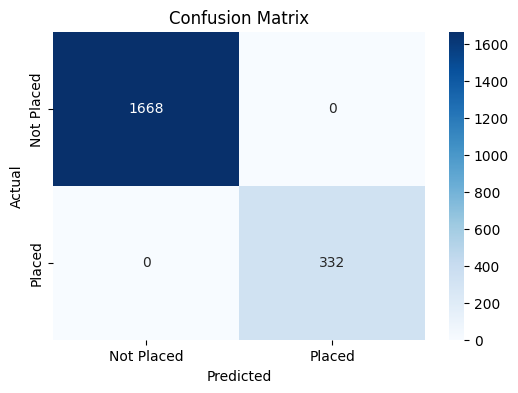

In [12]:
cm = confusion_matrix(y_test, y_pre)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Placed', 'Placed'],
            yticklabels=['Not Placed', 'Placed'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [13]:
new_student = pd.DataFrame([{
    'IQ': 110, 
    'Prev_Sem_Result': 8, 
    'CGPA': 8, 
    'Academic_Performance': 7, 
    'Internship_Experience': 1, 
    'Extra_Curricular_Score': 5, 
    'Communication_Skills': 9, 
    'Projects_Completed': 3
}])

pred_prob = model.predict_proba(new_student)[0][1] 
pred_label = "Placed" if pred_prob > 0.5 else "Not Placed"

print(f"New Student Prediction: {pred_label}")
print(f"Probability of Placement: {pred_prob:.2%}")

New Student Prediction: Not Placed
Probability of Placement: 0.03%


In [14]:
joblib.dump(model, "trained_model.pkl")
print("Model saved successfully")

Model saved successfully
